## Scikit-Learn

In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set()
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *
DATA_DIR = '../data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Machine Learning Problems

Supervised learning: Models that can predict labels based on labeled training data

* Classification: Models that predict labels as two or more discrete categories
* Regression: Models that predict continuous labels

Unsupervised learning: Models that identify structure in unlabeled data

* Clustering: Models that detect and identify distinct groups in the data
* Dimensionality reduction: Models that detect and identify lower-dimensional structure in higher-dimensional data

### Scikit-Learn Workflow

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
    * For supervised learning, often we predict labels for unknown data using the predict() method.
    * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

### Import Data

In [7]:
# Dataset with a bunch of numerical features and a class label
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# Target (y)
y_iris = iris['species']
y_iris.shape

(150,)

In [11]:
# Features
X_iris = iris.drop('species', axis=1) # clear target
X_iris.shape

(150, 4)

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png)

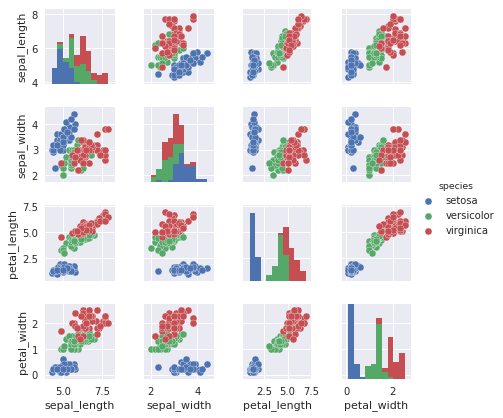

In [12]:
# Plot the species label vs each feature pair independently
sns.pairplot(iris, hue='species', size=1.5);

### Random Seed

In [33]:
# Way to reproduce your work, coefficients, generated data
seed = np.random.RandomState(15)

# Uniform random between 0 and 1
seed.rand(5) 

array([0.8488177 , 0.17889592, 0.05436321, 0.36153845, 0.27540093])

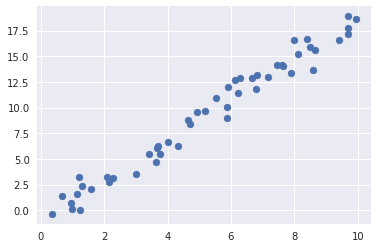

In [41]:
X = 10 * seed.rand(50)
y = 2 * X - 1 + seed.randn(50)
plt.scatter(X, y);
X = X.reshape((-1,1))

### Linear Regression

* http://scikit-learn.org/stable/modules/linear_model.html

In [36]:
from sklearn.linear_model import LinearRegression

# Default is Ordinary Least Squares
# Minimizes sum-squared error between prediction and targets
# by estimating coefficients

In [42]:
# Hyperparameters
"""
Bias - include offset? (y-intercept)
Normalization - normalize inputs?
Regularization - 
"""
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# Train model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# We have 1 weight for 1 feature (x)
print("Coeff", model.coef_[0])

# We asked for a bias offset, too
print("Bias", model.intercept_)

Coeff 1.9748485886229479
Bias -1.0266505995219468


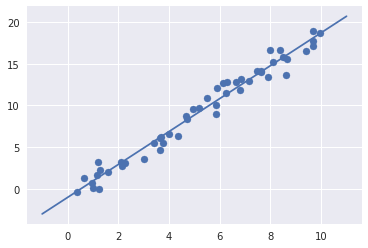

In [55]:
# Predict

# Create test set (evenly spaced numbers in range)
X_test = np.linspace(-1, 11).reshape(-1,1)
y_pred = model.predict(X_test)
plt.scatter(X, y)
plt.plot(X_test, y_pred);

### Supervised Learning

In [57]:
from sklearn.cross_validation import train_test_split

# Create RANDOM train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1);

In [58]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Dimensionality Reduction

* Iris has 4 features (4D)
* Let's use PCA to reduce it to 2D

In [60]:
from sklearn.decomposition import PCA  # 1. Choose the model class

model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

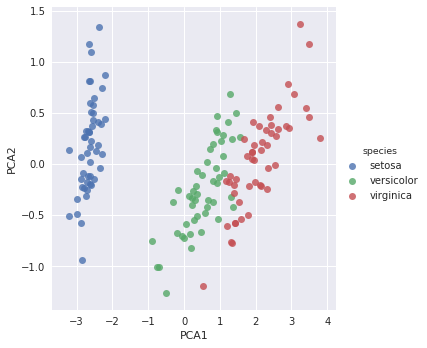

In [62]:
# Add the output to the original Iris DF
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

# Plot data and regression model fits across a FacetGrid.
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Clustering

* A clustering algorithm attempts to find distinct groups of data without reference to any labels. 
* Here we will use a powerful clustering method called a Gaussian mixture model (GMM), 

In [66]:
from sklearn.mixture import GMM      # 1. Choose the model class

model = GMM(n_components=3,
            covariance_type='full');  # 2. Instantiate the model with hyperparameters
model.fit(X_iris);                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris);        # 4. Determine cluster labels

/home/bfortuner/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/bfortuner/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/bfortuner/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/bfortuner/anaconda3/lib/python3.6/site-packages/sklearn/util

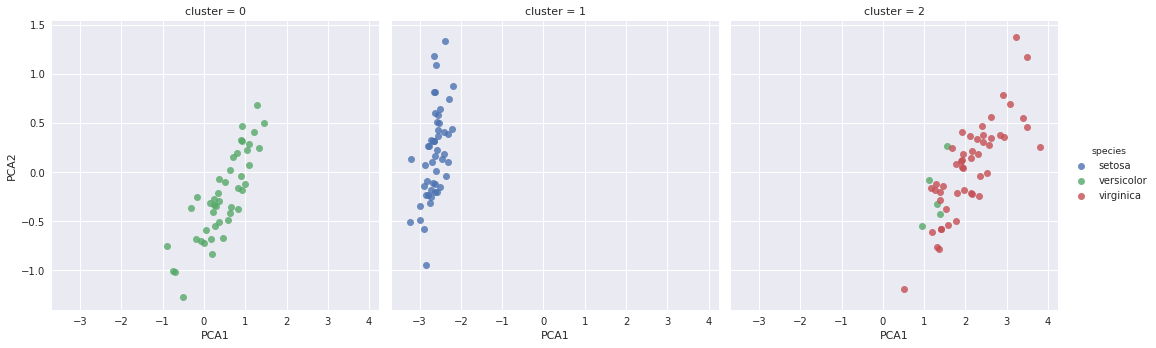

In [67]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

### Image Clustering

In [68]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

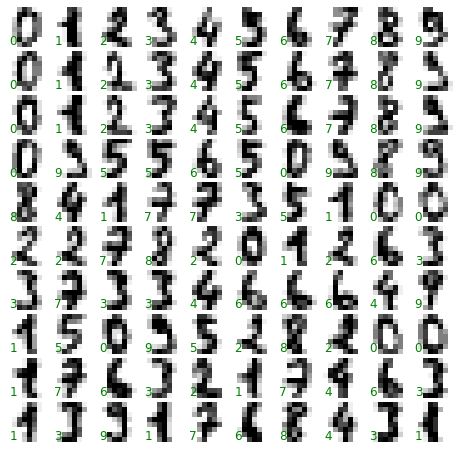

In [69]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [70]:
X = digits.data
X.shape

(1797, 64)

In [71]:
y = digits.target
y.shape

(1797,)

In [72]:
## Manifold Learning!
## How can we reduce a high dimensional space (64 features) to something we can visualize?

from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

/home/bfortuner/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


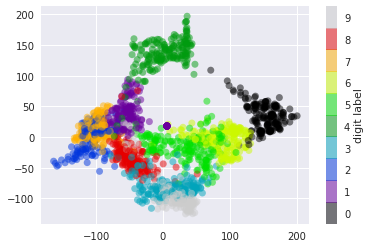

In [73]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Image Classification

In [74]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [75]:
# These algos work for any flattened feature vector
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

### Confusion Matrix

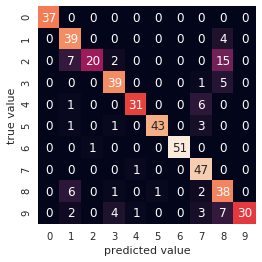

In [77]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

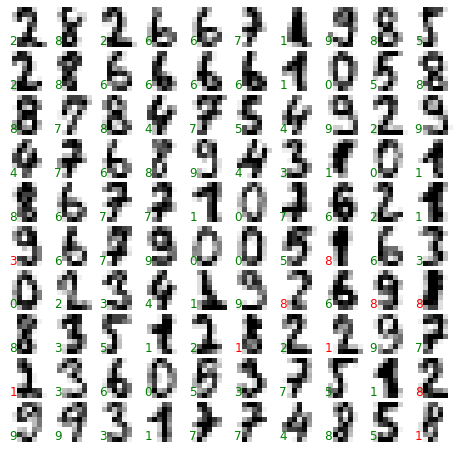

In [78]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

### References

* https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html